**Therapeutic Dose of Warfarin Using Regression Machine Learning Models**

- Praeeth Kaudgula

***Setup the project on Google Colab***

In [22]:

from google.colab import drive
drive.mount('/content/drive' )

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
%cd /content/drive/MyDrive/FINAL_ML_PROJECT

/content/drive/MyDrive/FINAL_ML_PROJECT


In [24]:
pwd 

'/content/drive/MyDrive/FINAL_ML_PROJECT'

***Prepare the dataset***

In [26]:
from numpy.lib.utils import info
from pandas.core import describe
import pandas as pd

# Load the dataset into a pandas dataframe
file_path = "/content/drive/MyDrive/FINAL_ML_PROJECT/Raw_dataset.xls"
data = pd.read_excel(file_path, sheet_name='Subject Data', header=0) # previously when i selected header equals to none it selected row index from 0 to 67 so by selecting header equals to 0  it should set 1st row

# Get the number of columns in the dataframe
num_cols = len(data.columns)
print("number of columns in the dataframe :",num_cols-1)
print(data.columns)

number of columns in the dataframe : 67
Index(['PharmGKB Subject ID', 'PharmGKB Sample ID', 'Project Site', 'Gender',
       'Race (Reported)', 'Race (OMB)', 'Ethnicity (Reported)',
       'Ethnicity (OMB)', 'Age', 'Height (cm)', 'Weight (kg)',
       'Indication for Warfarin Treatment', 'Comorbidities', 'Diabetes',
       'Congestive Heart Failure and/or Cardiomyopathy', 'Valve Replacement',
       'Medications', 'Aspirin', 'Acetaminophen or Paracetamol (Tylenol)',
       'Was Dose of Acetaminophen or Paracetamol (Tylenol) >1300mg/day',
       'Simvastatin (Zocor)', 'Atorvastatin (Lipitor)', 'Fluvastatin (Lescol)',
       'Lovastatin (Mevacor)', 'Pravastatin (Pravachol)',
       'Rosuvastatin (Crestor)', 'Cerivastatin (Baycol)',
       'Amiodarone (Cordarone)', 'Carbamazepine (Tegretol)',
       'Phenytoin (Dilantin)', 'Rifampin or Rifampicin',
       'Sulfonamide Antibiotics', 'Macrolide Antibiotics',
       'Anti-fungal Azoles', 'Herbal Medications, Vitamins, Supplements',
       'T

In [5]:
#selecting required features and target varible from the dataset
import pandas as pd



# Select the required columns from the dataset
selected_columns = [
    'Gender', 'Race (Reported)', 'Age', 'Height (cm)', 'Weight (kg)',
    'Diabetes', 'Simvastatin (Zocor)', 'Amiodarone (Cordarone)',
    'INR on Reported Therapeutic Dose of Warfarin',
    'VKORC1 genotype: -1639 G>A (3673); chr16:31015190; rs9923231; C/T',
    'Therapeutic Dose of Warfarin'
]

# Get the column indices for the selected columns
column_indices = [data.columns.get_loc(col) for col in selected_columns]

# Create a new dataframe with the selected columns
filtered_data = data.iloc[:, column_indices]

# Rename the columns for easier access
filtered_data.columns = [
    'Gender', 'Race', 'Age', 'Height', 'Weight', 'Diabetes', 'Simvastatin',
    'Amiodarone', 'INR', 'VKORC1_genotype', 'Therapeutic_Dose'
]

# Print the filtered dataframe
print(filtered_data.head())


   Gender   Race      Age   Height  Weight  Diabetes  Simvastatin  Amiodarone  \
0    male  White  60 - 69  193.040   115.7       NaN          0.0         0.0   
1  female  White  50 - 59  176.530   144.2       NaN          0.0         0.0   
2  female  White  40 - 49  162.560    77.1       NaN          0.0         0.0   
3    male  White  60 - 69  182.245    90.7       NaN          0.0         0.0   
4    male  White  50 - 59  167.640    72.6       NaN          0.0         0.0   

    INR VKORC1_genotype  Therapeutic_Dose  
0  2.60             A/G              49.0  
1  2.15             A/A              42.0  
2  1.90             G/G              53.0  
3  2.40             A/G              28.0  
4  1.90             A/G              42.0  


In [6]:
# Split the data into features (X) and target (y) variables
X = filtered_data.drop(columns=['Therapeutic_Dose'])
y = filtered_data['Therapeutic_Dose']
print (X.head())
print(y.head())


   Gender   Race      Age   Height  Weight  Diabetes  Simvastatin  Amiodarone  \
0    male  White  60 - 69  193.040   115.7       NaN          0.0         0.0   
1  female  White  50 - 59  176.530   144.2       NaN          0.0         0.0   
2  female  White  40 - 49  162.560    77.1       NaN          0.0         0.0   
3    male  White  60 - 69  182.245    90.7       NaN          0.0         0.0   
4    male  White  50 - 59  167.640    72.6       NaN          0.0         0.0   

    INR VKORC1_genotype  
0  2.60             A/G  
1  2.15             A/A  
2  1.90             G/G  
3  2.40             A/G  
4  1.90             A/G  
0    49.0
1    42.0
2    53.0
3    28.0
4    42.0
Name: Therapeutic_Dose, dtype: float64


In [7]:
# Get height range in X column
height_range = X['Height'].describe()[['min', 'max']]
print("Height range:", height_range)

Height range: min    124.968
max    202.000
Name: Height, dtype: float64


 ***Proper feature diagnosis and visualization***

   Gender   Race      Age   Height  Weight  Diabetes  Simvastatin  Amiodarone  \
0    male  White  60 - 69  193.040   115.7       NaN          0.0         0.0   
1  female  White  50 - 59  176.530   144.2       NaN          0.0         0.0   
2  female  White  40 - 49  162.560    77.1       NaN          0.0         0.0   
3    male  White  60 - 69  182.245    90.7       NaN          0.0         0.0   
4    male  White  50 - 59  167.640    72.6       NaN          0.0         0.0   

    INR VKORC1_genotype  Therapeutic_Dose  
0  2.60             A/G              49.0  
1  2.15             A/A              42.0  
2  1.90             G/G              53.0  
3  2.40             A/G              28.0  
4  1.90             A/G              42.0  
************************************************************************

 		missing values		
************************************************************************

Gender                 4
Race                 506
Age                   42
Height

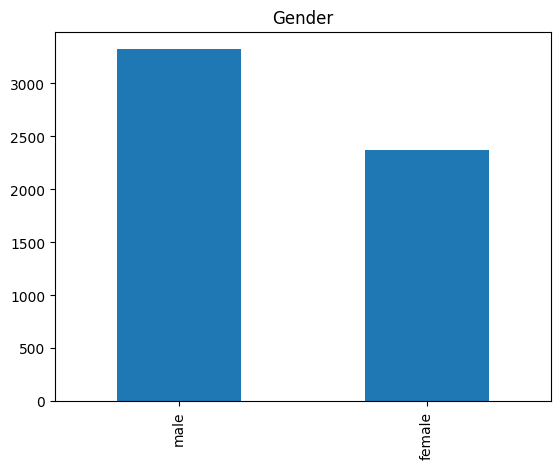

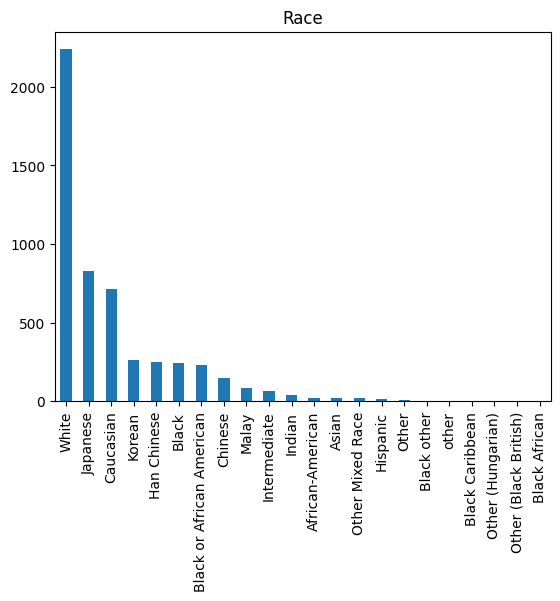

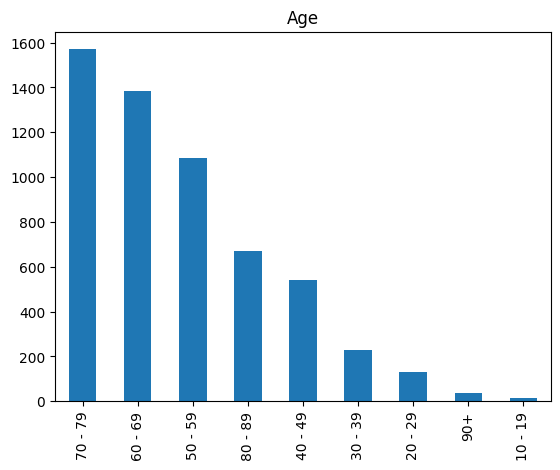

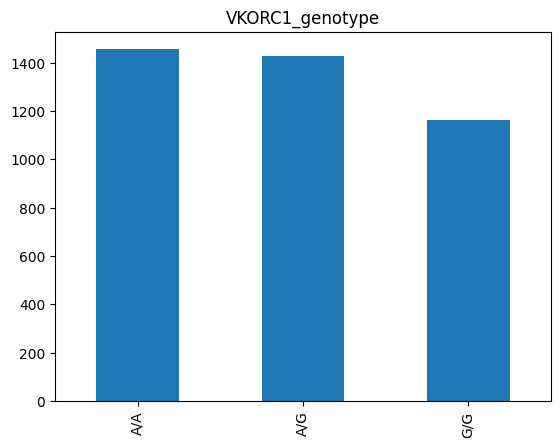

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Visualize the filter_data using pandas
print(filtered_data.head())

print("************************************************************************\n")
print(" \t\tmissing values\t\t")
print("************************************************************************\n")
# Check for missing values
print(filtered_data.isnull().sum())

print("************************************************************************\n")
print("\t\tsummary statistics for numerical features\t\t\n")
print("************************************************************************\n")
# Generate summary statistics for numerical features
print(filtered_data.describe())
print("************************************************************************\n")
# Visualize categorical features using bar plots
categorical_columns = ['Gender', 'Race', 'Age', 'VKORC1_genotype']

for column in categorical_columns:
    plt.figure()
    filtered_data[column].value_counts().plot(kind='bar', title=column)
    plt.show()



***Categorical text data should be converted into numbers***

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# One-hot encoding for 'Gender', 'Race', and 'VKORC1_genotype'
data_encoded = pd.get_dummies(filtered_data, columns=['Gender', 'Race', 'VKORC1_genotype'],drop_first=True) #dummy variable trap 

# Ordinal encoding for 'Age'
age_mapping = {
    '10 - 19': 0,
    '20 - 29': 1,
    '30 - 39': 2,
    '40 - 49': 3,
    '50 - 59': 4,
    '60 - 69': 5,
    '70 - 79': 6,
    '80 - 89': 7,
    '90 - 99': 8,
    '90+': 9
}


data_encoded['Age'] = data_encoded['Age'].replace(age_mapping)

print(data_encoded.head())




   Age   Height  Weight  Diabetes  Simvastatin  Amiodarone   INR  \
0  5.0  193.040   115.7       NaN          0.0         0.0  2.60   
1  4.0  176.530   144.2       NaN          0.0         0.0  2.15   
2  3.0  162.560    77.1       NaN          0.0         0.0  1.90   
3  5.0  182.245    90.7       NaN          0.0         0.0  2.40   
4  4.0  167.640    72.6       NaN          0.0         0.0  1.90   

   Therapeutic_Dose  Gender_male  Race_Asian  ...  Race_Korean  Race_Malay  \
0              49.0            1           0  ...            0           0   
1              42.0            0           0  ...            0           0   
2              53.0            0           0  ...            0           0   
3              28.0            1           0  ...            0           0   
4              42.0            1           0  ...            0           0   

   Race_Other  Race_Other (Black British)  Race_Other (Hungarian)  \
0           0                           0            

Model the imputation across multiple variables by iteratively estimating missing values (ŷ) from a model based on the other observed feature variables

This method considers relationships between variables to impute missing values iteratively

In [29]:
import pandas as pd
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# Next, create an iterative imputer
imputer = IterativeImputer(max_iter=10, random_state=0)

# Impute missing values
data_imputed = imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed = pd.DataFrame(data_imputed, columns=data_encoded.columns)
# Check for missing values
print(data_imputed.isnull().sum())



Age                               0
Height                            0
Weight                            0
Diabetes                          0
Simvastatin                       0
Amiodarone                        0
INR                               0
Therapeutic_Dose                  0
Gender_male                       0
Race_Asian                        0
Race_Black                        0
Race_Black African                0
Race_Black Caribbean              0
Race_Black or African American    0
Race_Black other                  0
Race_Caucasian                    0
Race_Chinese                      0
Race_Han Chinese                  0
Race_Hispanic                     0
Race_Indian                       0
Race_Intermediate                 0
Race_Japanese                     0
Race_Korean                       0
Race_Malay                        0
Race_Other                        0
Race_Other (Black British)        0
Race_Other (Hungarian)            0
Race_Other Mixed Race       

Model the imputation using KNNImputer from scikit-learn for imputing missing values in the filtered data

In [30]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer

# Create a KNNImputer object with default parameters (n_neighbors=5)
knn_imputer = KNNImputer()

# Fit and transform the filtered data using the KNNImputer object
data_imputed_Knn = knn_imputer.fit_transform(data_encoded)

# Convert the imputed array back to a DataFrame
data_imputed_Knn = pd.DataFrame(data_imputed_Knn, columns=data_encoded.columns)
# Check for missing values
print(data_imputed_Knn.isnull().sum())
print(data_imputed_Knn.columns)



Age                               0
Height                            0
Weight                            0
Diabetes                          0
Simvastatin                       0
Amiodarone                        0
INR                               0
Therapeutic_Dose                  0
Gender_male                       0
Race_Asian                        0
Race_Black                        0
Race_Black African                0
Race_Black Caribbean              0
Race_Black or African American    0
Race_Black other                  0
Race_Caucasian                    0
Race_Chinese                      0
Race_Han Chinese                  0
Race_Hispanic                     0
Race_Indian                       0
Race_Intermediate                 0
Race_Japanese                     0
Race_Korean                       0
Race_Malay                        0
Race_Other                        0
Race_Other (Black British)        0
Race_Other (Hungarian)            0
Race_Other Mixed Race       

 we will generate histograms for continuous features, box plots for continuous features, and count plots for categorical features. These visualizations will help us understand the distribution and potential outliers in the data

               Age       Height       Weight     Diabetes  Simvastatin  \
count  5700.000000  5700.000000  5700.000000  5700.000000  5700.000000   
mean      4.931232   168.038579    77.671850     0.171793     0.131114   
std       1.482988    10.352650    21.516673     0.301646     0.294672   
min       0.000000   124.968000    30.000000    -0.082574    -0.098495   
25%       4.000000   160.020000    62.475000     0.000000     0.000000   
50%       5.000000   167.894000    75.000000     0.042551     0.000000   
75%       6.000000   175.769269    89.400000     0.174299     0.100875   
max       9.000000   202.000000   237.700000     1.000000     1.000000   

        Amiodarone          INR  Therapeutic_Dose  Gender_male   Race_Asian  \
count  5700.000000  5700.000000       5700.000000  5700.000000  5700.000000   
mean      0.066985     2.364882         31.104256     0.582982     0.003158   
std       0.213629     0.442025         16.632172     0.493109     0.056111   
min      -0.06486

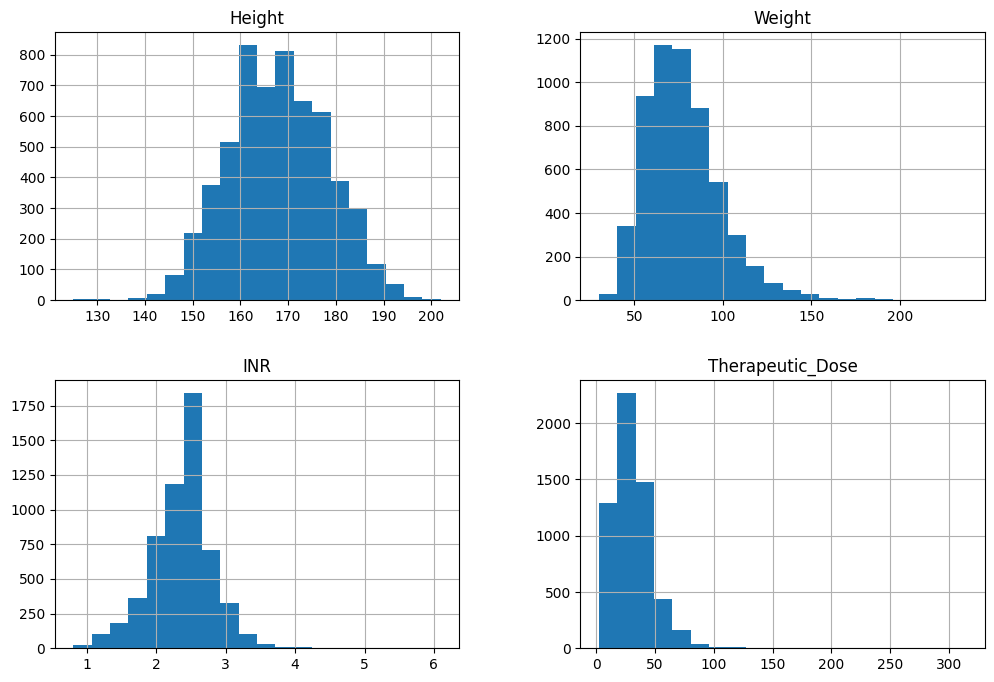

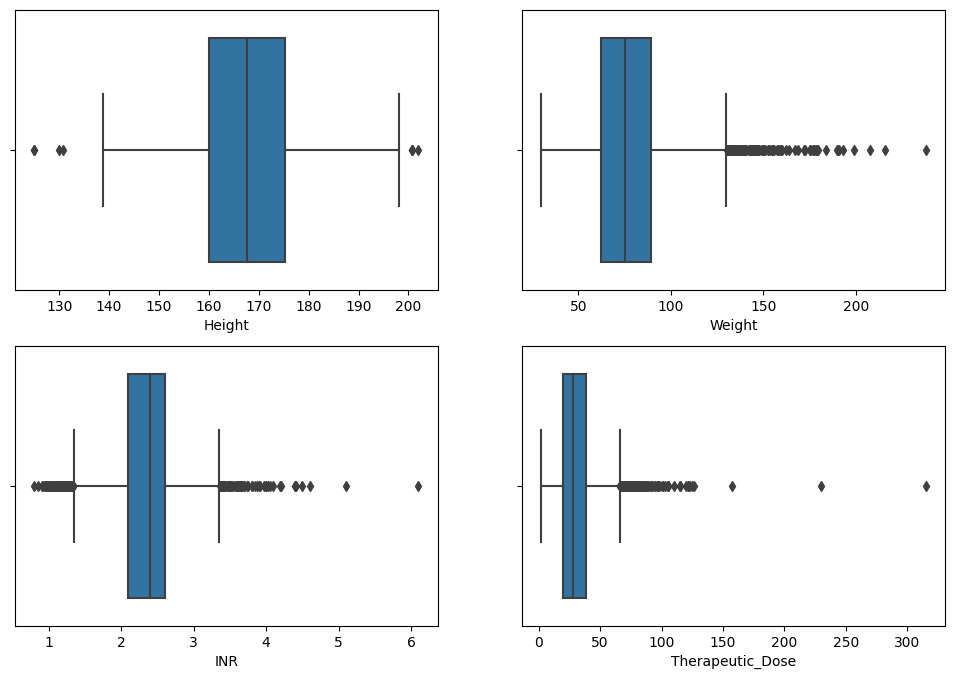

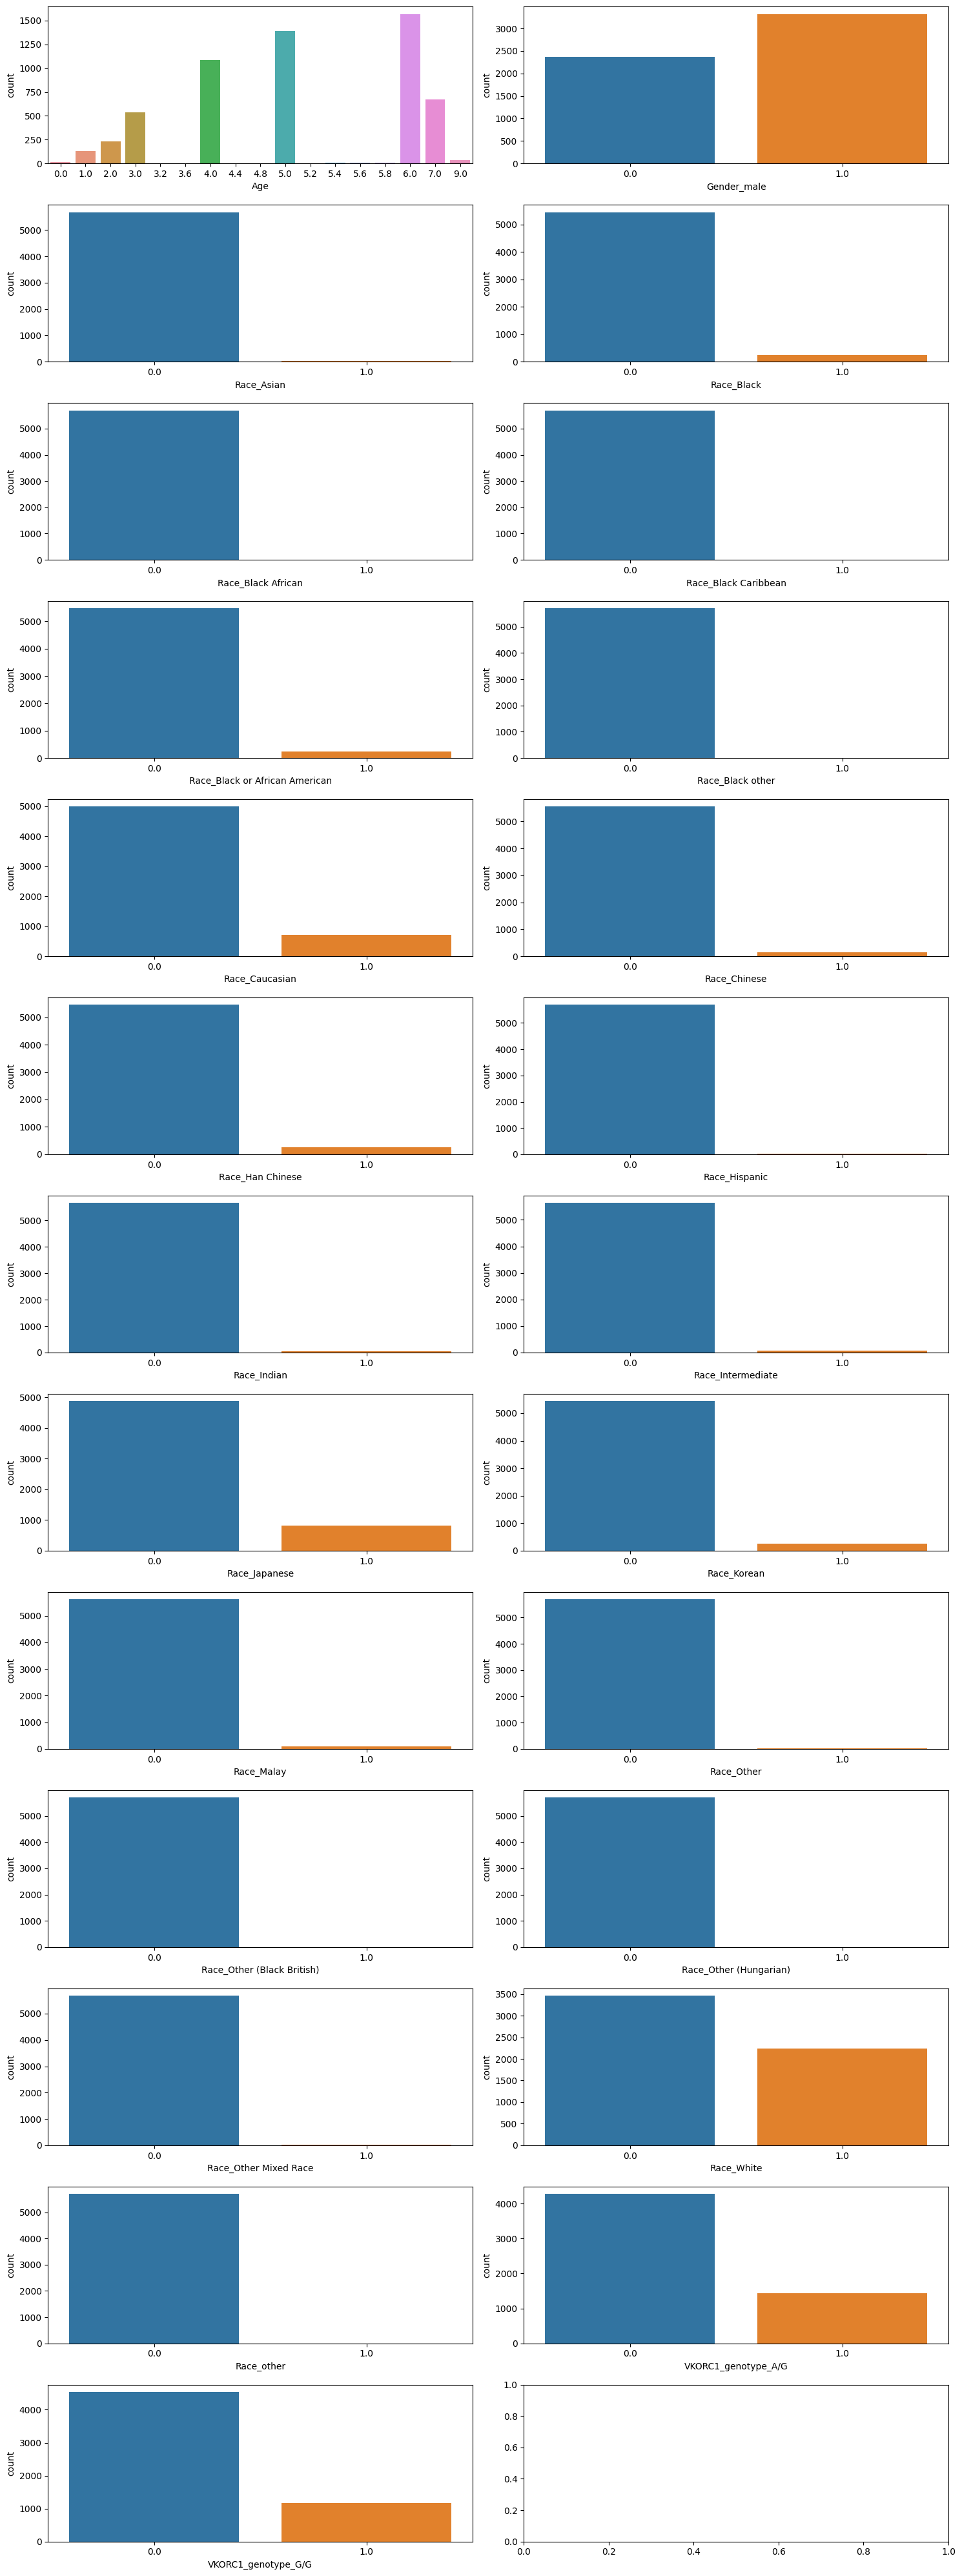

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Basic data exploration
print(data_imputed.describe())

# Histograms for continuous features
continuous_features = ['Height', 'Weight', 'INR', 'Therapeutic_Dose']
data_imputed_Knn[continuous_features].hist(bins=20, figsize=(12, 8))
plt.show()

# Box plots for continuous features
fig, axs = plt.subplots(2, 2, figsize=(12, 8))
for i, feature in enumerate(continuous_features):
    row = i // 2
    col = i % 2
    sns.boxplot(x=data_imputed_Knn[feature], ax=axs[row, col])
plt.show()

categorical_features = ['Age', 'Gender_male', 'Race_Asian', 'Race_Black', 'Race_Black African', 'Race_Black Caribbean', 'Race_Black or African American', 'Race_Black other', 'Race_Caucasian', 'Race_Chinese', 'Race_Han Chinese', 'Race_Hispanic', 'Race_Indian', 'Race_Intermediate', 'Race_Japanese', 'Race_Korean', 'Race_Malay', 'Race_Other', 'Race_Other (Black British)', 'Race_Other (Hungarian)', 'Race_Other Mixed Race', 'Race_White', 'Race_other', 'VKORC1_genotype_A/G', 'VKORC1_genotype_G/G']

fig, axs = plt.subplots(13, 2, figsize=(15, 40))
for i, feature in enumerate(categorical_features):
    row = i // 2
    col = i % 2
    sns.countplot(x=data_imputed_Knn[feature], ax=axs[row, col])
plt.tight_layout()
plt.show()


Since there are outliers in the dataset I will Remove those ouliers for better performance for machine learning model which I will conduct after

In [13]:
def remove_outliers_iqr(data, multiplier=1.5):
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR

    # Filter the outliers
    no_outliers_data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

    return no_outliers_data

# Remove outliers using the IQR method
data_imputed_no_outliers = remove_outliers_iqr(data_imputed)
data_imputed_Knn_no_outliers = remove_outliers_iqr(data_imputed_Knn)


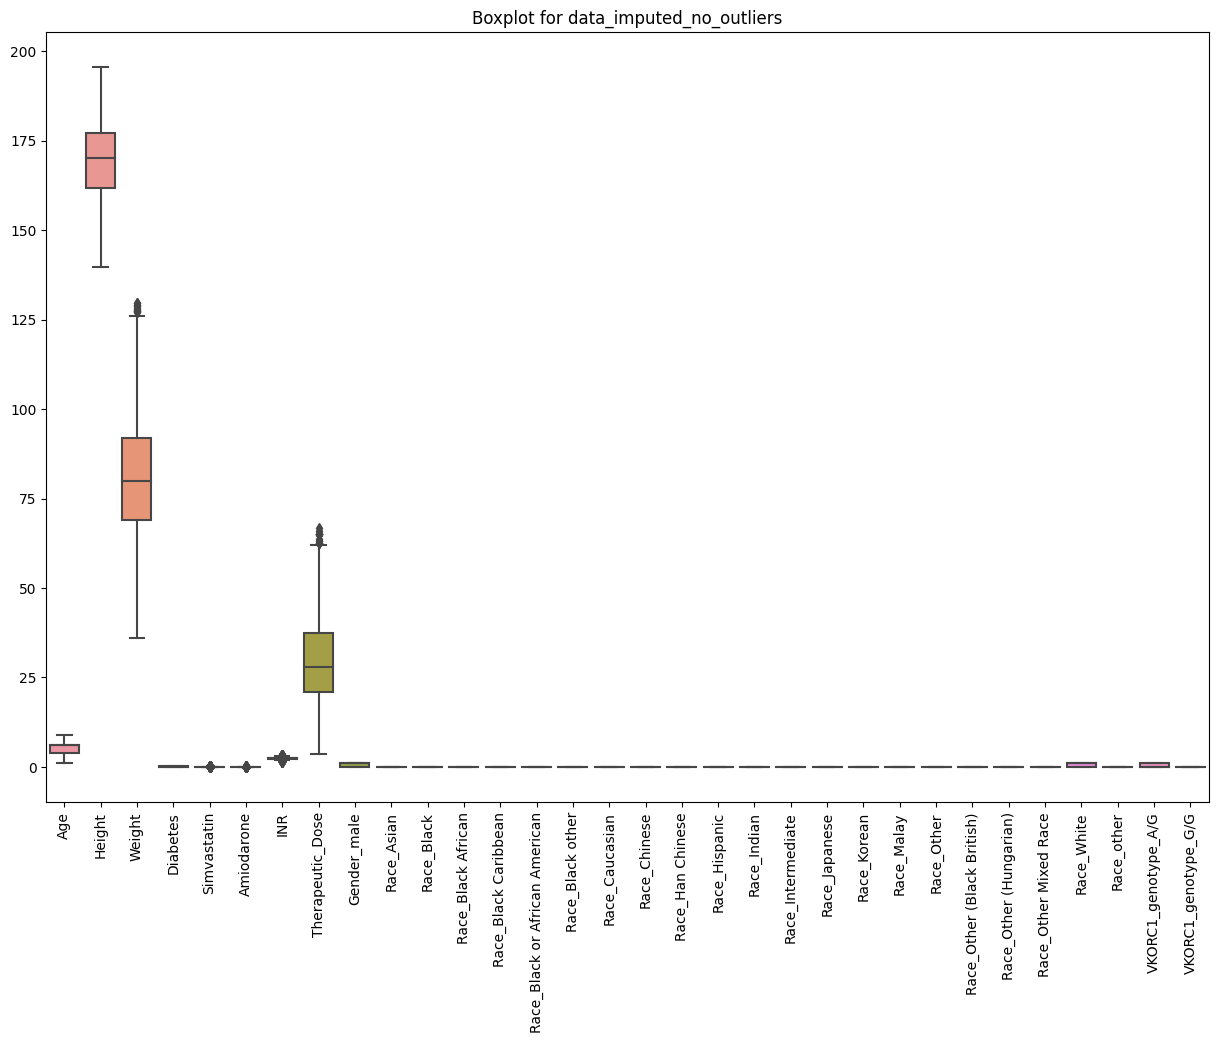

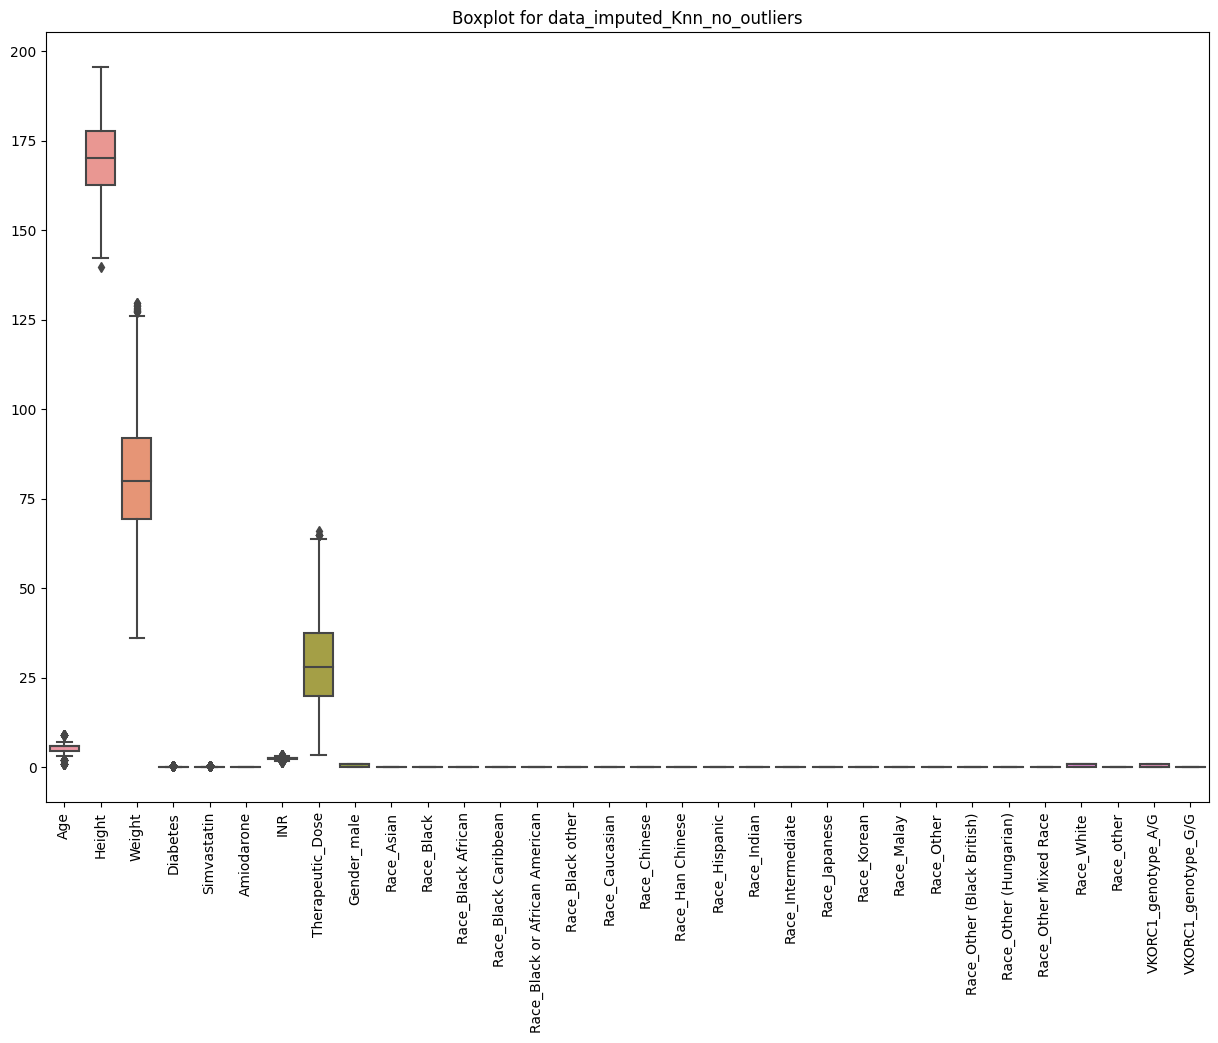

VIF for data_imputed_no_outliers:


/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss
/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1754: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


                          Features         VIF
0                              Age   15.152565
1                           Height  118.702445
2                           Weight   35.425381
3                         Diabetes    2.714486
4                      Simvastatin    5.764038
5                       Amiodarone    4.641961
6                              INR   53.638177
7                      Gender_male    2.899766
8                       Race_Asian         NaN
9                       Race_Black         NaN
10              Race_Black African         NaN
11            Race_Black Caribbean         NaN
12  Race_Black or African American         NaN
13                Race_Black other         NaN
14                  Race_Caucasian         NaN
15                    Race_Chinese         NaN
16                Race_Han Chinese         NaN
17                   Race_Hispanic         NaN
18                     Race_Indian         NaN
19               Race_Intermediate         NaN
20           

In [32]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

import matplotlib.pyplot as plt
import seaborn as sns

# Boxplot for data_imputed_no_outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_imputed_no_outliers)
plt.xticks(rotation=90)
plt.title("Boxplot for data_imputed_no_outliers")
plt.show()

# Boxplot for data_imputed_Knn_no_outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=data_imputed_Knn_no_outliers)
plt.xticks(rotation=90)
plt.title("Boxplot for data_imputed_Knn_no_outliers")
plt.show()

# VIF calculation after removing outliers
def calculate_vif(data):
    X = data.drop(columns=['Therapeutic_Dose'])
    vif = pd.DataFrame()
    vif["Features"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif

# Calculate VIF for data_imputed_no_outliers
print("VIF for data_imputed_no_outliers:")
print(calculate_vif(data_imputed_no_outliers))

# Calculate VIF for data_imputed_Knn_no_outliers
print("\nVIF for data_imputed_Knn_no_outliers:")
print(calculate_vif(data_imputed_Knn_no_outliers))


In [33]:
print("Null values in data_imputed_no_outliers:")
print(data_imputed_no_outliers.isnull().sum())

print("\nNull values in data_imputed_Knn_no_outliers:")
print(data_imputed_Knn_no_outliers.isnull().sum())


Null values in data_imputed_no_outliers:
Age                               0
Height                            0
Weight                            0
Diabetes                          0
Simvastatin                       0
Amiodarone                        0
INR                               0
Therapeutic_Dose                  0
Gender_male                       0
Race_Asian                        0
Race_Black                        0
Race_Black African                0
Race_Black Caribbean              0
Race_Black or African American    0
Race_Black other                  0
Race_Caucasian                    0
Race_Chinese                      0
Race_Han Chinese                  0
Race_Hispanic                     0
Race_Indian                       0
Race_Intermediate                 0
Race_Japanese                     0
Race_Korean                       0
Race_Malay                        0
Race_Other                        0
Race_Other (Black British)        0
Race_Other (Hungarian) 

From the VIF values  provided for both ***data_imputed*** and ***data_imputed_Knn***, it is evident that some features have high VIF values, indicating multicollinearity issues.

For ***data_imputed***, features with high VIF values are:

- Height (VIF = 111.089405)
- Weight (VIF = 26.262019)
- INR (VIF = 38.234185)
- Age (VIF = 13.205655)

For ***data_imputed_Knn***, features with high VIF values are:

- Height (VIF = 105.247624)
- Weight (VIF = 25.313025)
- INR (VIF = 36.246995)
- Age (VIF = 13.217659)

We should consider removing or combining some of these highly correlated features to address multicollinearity issues. In this case, since Height and Weight are highly correlated, We can create a new variable called BMI (Body Mass Index) and remove Height and Weight.

In [34]:
# Recalculate VIF for data_imputed
X_imputed = data_imputed.drop(columns=['Therapeutic_Dose'])
vif = pd.DataFrame()
vif["Features"] = X_imputed.columns
vif["VIF"] = [variance_inflation_factor(X_imputed.values, i) for i in range(X_imputed.shape[1])]
print(vif)
print("********************data_imputed_Knn*************************\n")
# Recalculate VIF for data_imputed_Knn
X_imputed_Knn = data_imputed_Knn.drop(columns=['Therapeutic_Dose'])
vif = pd.DataFrame()
vif["Features"] = X_imputed_Knn.columns
vif["VIF"] = [variance_inflation_factor(X_imputed_Knn.values, i) for i in range(X_imputed_Knn.shape[1])]
print(vif)


                          Features         VIF
0                              Age   13.205655
1                           Height  111.089405
2                           Weight   26.262019
3                         Diabetes    1.519133
4                      Simvastatin    1.348592
5                       Amiodarone    1.136026
6                              INR   38.234185
7                      Gender_male    3.044221
8                       Race_Asian    1.042061
9                       Race_Black    1.681433
10              Race_Black African    1.003118
11            Race_Black Caribbean    1.006221
12  Race_Black or African American    1.546980
13                Race_Black other    1.011803
14                  Race_Caucasian    2.767064
15                    Race_Chinese    1.352958
16                Race_Han Chinese    1.527364
17                   Race_Hispanic    1.027572
18                     Race_Indian    1.102541
19               Race_Intermediate    1.206440
20           

 ***For both datasets, Age, INR,have high VIF values. so I will proceed with PCA before but downside of it is we you will lose the original feature interpretability. PCA is a dimensionality reduction technique that transforms the original features into a new set of orthogonal (uncorrelated) features, called principal components.***

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Separate the features (X) from the target (y) for data_imputed_no_outliers
X_imputed_no_outliers = data_imputed_no_outliers.drop(columns=['Therapeutic_Dose'])
y_imputed_no_outliers = data_imputed_no_outliers['Therapeutic_Dose']

# Separate the features (X) from the target (y) for data_imputed_Knn_no_outliers
X_imputed_Knn_no_outliers = data_imputed_Knn_no_outliers.drop(columns=['Therapeutic_Dose'])
y_imputed_Knn_no_outliers = data_imputed_Knn_no_outliers['Therapeutic_Dose']

# Standardize the data
scaler = StandardScaler()
X_imputed_no_outliers_scaled = scaler.fit_transform(X_imputed_no_outliers)
X_imputed_Knn_no_outliers_scaled = scaler.fit_transform(X_imputed_Knn_no_outliers)



# Apply PCA
pca = PCA()
X_imputed_no_outliers_pca = pca.fit_transform(X_imputed_no_outliers_scaled)
X_imputed_Knn_no_outliers_pca = pca.fit_transform(X_imputed_Knn_no_outliers_scaled)



# Calculate the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Print the explained variance ratio
print("Explained Variance Ratio:", explained_variance_ratio)

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# Choose the number of components to retain (e.g., 95% of the total variance)
n_components = np.argmax(cumulative_explained_variance >= 0.95) + 1
print("Number of components to retain:", n_components)

# Retain the selected components
pca = PCA(n_components=n_components)
X_imputed_no_outliers_pca = pca.fit_transform(X_imputed_no_outliers_scaled)
X_imputed_Knn_no_outliers_pca = pca.fit_transform(X_imputed_Knn_no_outliers_scaled)




Explained Variance Ratio: [2.45441682e-01 1.84192619e-01 1.49974137e-01 1.11308595e-01
 9.28660735e-02 7.17851527e-02 5.86986488e-02 5.24803049e-02
 3.32527872e-02 1.60927219e-33 1.60927219e-33 1.60927219e-33
 1.60927219e-33 1.60927219e-33 1.60927219e-33 1.60927219e-33
 1.60927219e-33 1.60927219e-33 1.60927219e-33 1.60927219e-33
 1.60927219e-33 1.60927219e-33 1.60927219e-33 1.60927219e-33
 1.60927219e-33 1.60927219e-33 1.60927219e-33 1.60927219e-33
 1.60927219e-33 1.60927219e-33 1.60927219e-33]
Number of components to retain: 8


In [35]:
import pickle

# Fit PCA to X_imputed_no_outliers_scaled
pca.fit(X_imputed_no_outliers_scaled)  #old X_imputed_no_outliers # previous old: X_imputed_Knn_no_outliers #new :X_imputed_no_outliers_scaled

# Standardize the data
scaler = StandardScaler()
X_imputed_no_outliers_scaled = scaler.fit_transform(X_imputed_no_outliers_scaled)


# Save PCA model as 'pca.pkl'
with open("pca.pkl", "wb") as f:
    pickle.dump(pca, f)

# Save the scaler model as 'scaler.pkl'
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)


In [18]:
# Create a separate scaler for the target variable
target_scaler = StandardScaler()

# Scale the target variable

y_imputed_no_outliers_scaled = target_scaler.fit_transform(y_imputed_no_outliers.values.reshape(-1, 1))

# Save the target scaler model as 'target_scaler.pkl'
with open("target_scaler.pkl", "wb") as f:
    pickle.dump(target_scaler, f)




In [19]:
print(X_imputed_Knn_no_outliers)

      Age   Height  Weight  Diabetes  Simvastatin  Amiodarone  INR  \
0     5.0  193.040  115.70       0.0          0.0         0.0  2.6   
3     5.0  182.245   90.70       0.0          0.0         0.0  2.4   
4     4.0  167.640   72.60       0.2          0.0         0.0  1.9   
13    3.0  165.100   96.60       0.0          0.0         0.0  2.1   
15    6.0  182.880  102.10       0.2          0.0         0.0  2.2   
...   ...      ...     ...       ...          ...         ...  ...   
5691  5.0  187.960   72.73       0.0          0.0         0.0  2.1   
5695  1.0  185.420  113.64       0.0          0.0         0.0  2.8   
5696  6.0  160.020   55.91       0.0          0.0         0.0  2.8   
5697  5.0  187.960   97.73       0.0          0.0         0.0  2.0   
5699  6.0  190.500   79.55       0.0          0.0         0.0  3.0   

      Gender_male  Race_Asian  Race_Black  ...  Race_Korean  Race_Malay  \
0             1.0         0.0         0.0  ...          0.0         0.0   
3        

 We can Examine the explained variance ratio and choose the number of components to retain. A common approach is to retain the components that cumulatively explain a certain percentage (e.g., 95%) of the total variance.

------------------ Linear Regression ------------------
Best Parameters: {}
Mean Absolute Error: 8.924826950733582
Mean Squared Error: 127.87053481598588
R2 Score: 0.21673709795359275


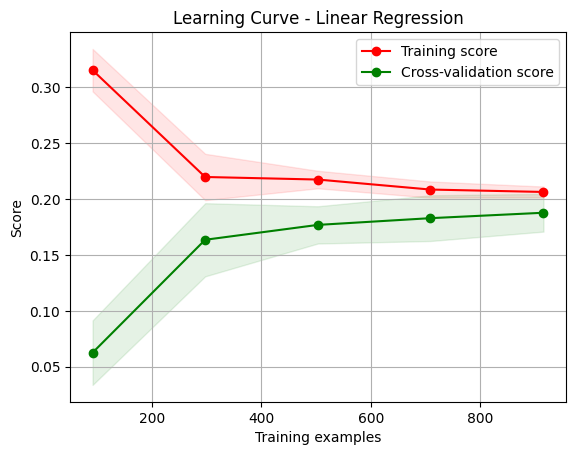

------------------ Random Forest ------------------
Best Parameters: {'max_depth': 18, 'min_samples_leaf': 10, 'min_samples_split': 3, 'n_estimators': 211}
Mean Absolute Error: 8.823932517009922
Mean Squared Error: 122.7792072562495
R2 Score: 0.24792370404268693


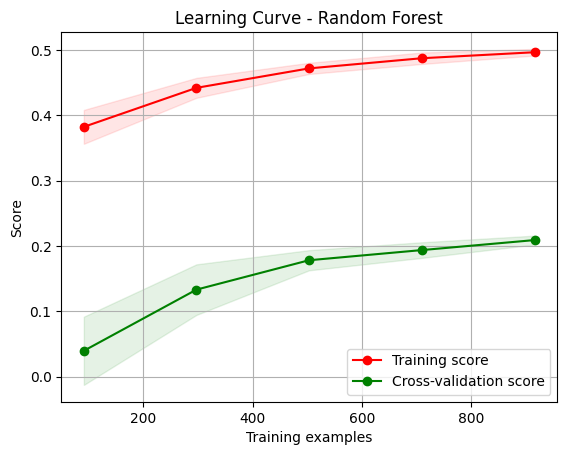

------------------ Ridge Regression ------------------
Best Parameters: {'alpha': 3.8796394086479773}
Mean Absolute Error: 8.925804732274925
Mean Squared Error: 127.86881766220594
R2 Score: 0.21674761627084893


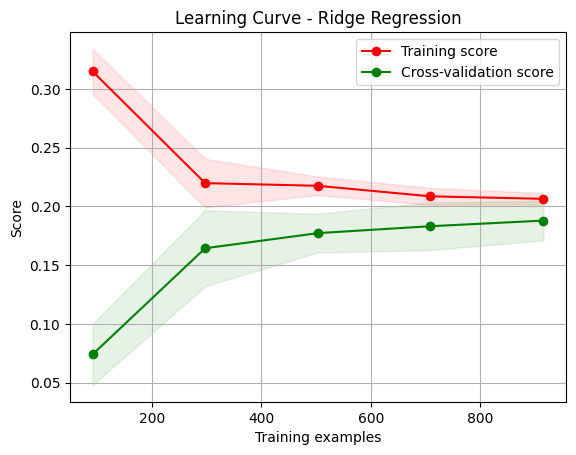

------------------ Decision Tree ------------------
Best Parameters: {'max_depth': 3, 'min_samples_leaf': 6, 'min_samples_split': 6}
Mean Absolute Error: 9.490071575392225
Mean Squared Error: 142.61099756418963
R2 Score: 0.12644532239888806


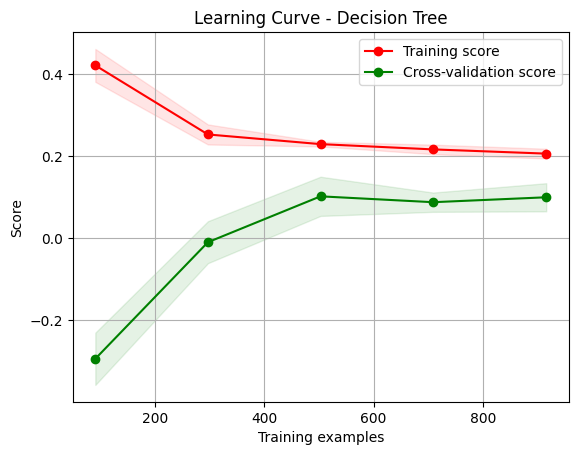

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import (mean_absolute_error,
                             mean_squared_error, r2_score)
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from scipy.stats import randint, uniform

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_no_outliers_pca, y_imputed_no_outliers, test_size=0.2, random_state=42)

# Hyperparameter tuning setup
tuning = {
    'Linear Regression': {
        'model': LinearRegression(),
        'params': {},
        'search': 'grid'
    },
    'Random Forest': {
        'model': RandomForestRegressor(),
        'params': {
            'n_estimators': randint(10, 500),
            'max_depth': randint(1, 50),
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 11)
        },
        'search': 'random'
    },
    'Ridge Regression': {
        'model': Ridge(),
        'params': {
            'alpha': uniform(loc=0, scale=4)
        },
        'search': 'random'
    },
    'Decision Tree': {
        'model': DecisionTreeRegressor(),
        'params': {
            'max_depth': randint(1, 50),
            'min_samples_split': randint(2, 11),
            'min_samples_leaf': randint(1, 11)
        },
        'search': 'random'
    }
}

def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Initialize dictionaries to store the best models
best_models = {
    'Linear Regression': None,
    'Random Forest': None,
    'Ridge Regression': None,
    'Decision Tree': None
}

for name, settings in tuning.items():
    model = settings['model']
    params = settings['params']
    search_type = settings['search']

    if search_type == 'grid':
        search = GridSearchCV(model, params, cv=5)
    elif search_type == 'random':
        search = RandomizedSearchCV(model,params, cv=5, n_iter=20, random_state=42)

    search.fit(X_train, y_train)
    best_model = search.best_estimator_
    best_params = search.best_params_
    y_pred = best_model.predict(X_test)

    print(f"------------------ {name} ------------------")
    print("Best Parameters:", best_params)
    print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
    print("R2 Score:", r2_score(y_test, y_pred))
    best_models[name] = best_model
    plot_learning_curve(best_model, f'Learning Curve - {name}', X_train, y_train, cv=5).show()

# Save and load the models
import pickle

for model_name, model_instance in best_models.items():
    with open(f'best_{model_name.replace(" ", "_")}_model.pkl', 'wb') as f:
        pickle.dump(model_instance, f)

loaded_models = {}

for model_name in best_models.keys():
    with open(f'best_{model_name.replace(" ", "_")}_model.pkl', 'rb') as f:
        loaded_models[model_name] = pickle.load(f)



In [21]:
!pip install scikit-optimize


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 3.4 MB/s eta 0:00:00


Trial 30 Complete [00h 02m 39s]
val_mean_absolute_error: 8.275596141815186

Best val_mean_absolute_error So Far: 7.917742729187012
Total elapsed time: 01h 20m 26s
Epoch 1/500
29/29 - 1s - loss: 94.5558 - mean_absolute_error: 7.3492 - val_loss: 112.6080 - val_mean_absolute_error: 7.8801 - 1s/epoch - 51ms/step
Epoch 2/500
29/29 - 0s - loss: 95.1615 - mean_absolute_error: 7.5176 - val_loss: 111.1417 - val_mean_absolute_error: 8.0470 - 122ms/epoch - 4ms/step
Epoch 3/500
29/29 - 0s - loss: 91.7228 - mean_absolute_error: 7.3694 - val_loss: 114.5507 - val_mean_absolute_error: 8.1693 - 116ms/epoch - 4ms/step
Epoch 4/500
29/29 - 0s - loss: 90.6629 - mean_absolute_error: 7.3659 - val_loss: 115.7775 - val_mean_absolute_error: 8.3358 - 110ms/epoch - 4ms/step
Epoch 5/500
29/29 - 0s - loss: 91.9422 - mean_absolute_error: 7.3130 - val_loss: 110.4845 - val_mean_absolute_error: 7.8106 - 126ms/epoch - 4ms/step
Epoch 6/500
29/29 - 0s - loss: 90.4054 - mean_absolute_error: 7.2008 - val_loss: 110.9479 - va

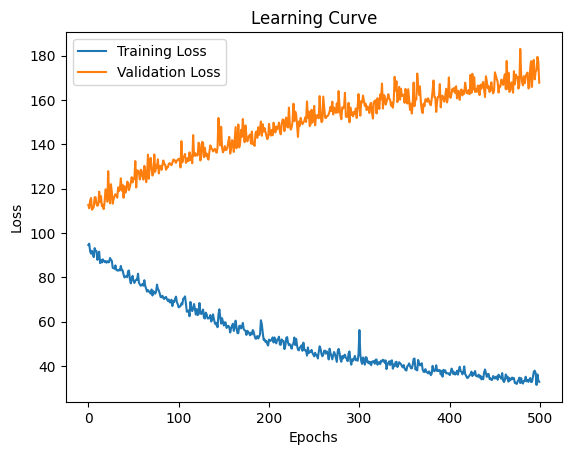

In [33]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras_tuner.tuners import RandomSearch
import matplotlib.pyplot as plt

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed_no_outliers_pca, y_imputed_no_outliers, test_size=0.2, random_state=42)

# Define the MLP model using TensorFlow Keras
def create_mlp(hp):
    activation = hp.Choice('activation', ['relu', 'sigmoid'])
    optimizer = hp.Choice('optimizer', ['adam', 'sgd'])
    learning_rate = hp.Float('learning_rate', 0.001, 0.01)
    hidden_layer_size = hp.Choice('hidden_layer_size', [50, 100])

    model = tf.keras.Sequential([
        tf.keras.layers.Dense(hidden_layer_size, activation=activation, input_shape=(X_train.shape[1],)),
        tf.keras.layers.Dense(hidden_layer_size, activation=activation),
        tf.keras.layers.Dense(1)
    ])

    opt = tf.keras.optimizers.get(optimizer)
    opt.learning_rate = learning_rate

    model.compile(optimizer=opt, loss='mean_squared_error', metrics=['mean_absolute_error'])
    return model

# Create a RandomSearch tuner
tuner = RandomSearch(
    create_mlp,
    objective='val_mean_absolute_error',
    max_trials=30,
    executions_per_trial=2,
    directory='random_search',
    project_name='mlp_hyperparams'
)

# Search for the best hyperparameters
tuner.search(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2)

# Retrieve the best model and parameters
best_model = tuner.get_best_models(num_models=1)[0]
best_params = tuner.get_best_hyperparameters(num_trials=1)[0]

# Train the best model on the training data
history = best_model.fit(X_train, y_train, epochs=500, batch_size=32, validation_split=0.2, verbose=2)

# Save the best MLP model
best_model.save('best_mlp_model.h5')

# Make predictions on the test set
y_pred = best_model.predict(X_test).reshape(-1)

# Calculate the performance metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the performance metrics
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")

# Plot the learning curve
plt.figure()
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Learning Curve')
plt.legend()
plt.show()


In [46]:
pip install gradio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 71.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 69.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.0/57.0 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 287.9/287.9 kB 30.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.3/75.3 kB 10.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.5/50.5 kB 6.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 137.2/137.2 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 

In [20]:
import gradio as gr
import joblib
import pandas as pd
import numpy as np
import pickle
import tensorflow as tf

# Load the saved models
best_models = [
    ("Linear Regression", joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/best_Linear_Regression_model.pkl')),
    ("Random Forest", joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/best_Random_Forest_model.pkl')),
    ("Ridge Regression", joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/best_Ridge_Regression_model.pkl')),
    ("Decision Tree", joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/best_Decision_Tree_model.pkl')),
    ("MLP", tf.keras.models.load_model('/content/drive/MyDrive/FINAL_ML_PROJECT/best_mlp_model.h5')),
]

# Load the saved scaler, PCA, and target scaler
scaler = joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/scaler.pkl')
pca = joblib.load('/content/drive/MyDrive/FINAL_ML_PROJECT/pca.pkl')
#----------------------------------------
#with open("target_scaler.pkl", "rb") as f:
   # target_scaler = pickle.load(f)
#---------------------------------------   uncomment this statement to get scaled predidcted values


attribute_names = [
    'Age', 'Height', 'Weight', 'Diabetes', 'Simvastatin', 'Amiodarone',
    'INR', 'Gender', 'Race', 'VKORC1_genotype'
]

race_columns = [
    'Race_Asian', 'Race_Black', 'Race_Black African', 'Race_Black Caribbean',
    'Race_Black or African American', 'Race_Black other', 'Race_Caucasian',
    'Race_Chinese', 'Race_Han Chinese', 'Race_Hispanic', 'Race_Indian',
    'Race_Intermediate', 'Race_Japanese', 'Race_Korean', 'Race_Malay',
    'Race_Other', 'Race_Other (Black British)', 'Race_Other (Hungarian)',
    'Race_Other Mixed Race', 'Race_White', 'Race_other'
]

def predict(*args):
    user_features = list(args[:-1])
    model_name = args[-1]
    model = dict(best_models)[model_name]
    
    # Mapping categorical inputs to numerical values
    user_features[3] = 1 if user_features[3] == 'Yes' else 0  # Diabetes
    user_features[4] = 1 if user_features[4] == 'Yes' else 0  # Simvastatin
    user_features[5] = 1 if user_features[5] == 'Yes' else 0  # Amiodarone
    user_features[7] = 1 if user_features[7] == 'Male' else 0  # Gender
    
    # Handling one-hot encoding for 'Race'
    race = user_features.pop(8)
    race_encoded = [1 if col == race else 0 for col in race_columns]
    user_features = user_features[:8] + race_encoded + user_features[8:]
    
    # Handling one-hot encoding for 'VKORC1_genotype'
    vkorc1_genotype = user_features.pop(-1)
    vkorc1_genotype_encoded = [1 if vkorc1_genotype == 'A/G' else 0, 1 if vkorc1_genotype == 'G/G' else 0]
    user_features += vkorc1_genotype_encoded
    
    input_data = np.array(user_features).reshape(1, -1)
    input_data_scaled = scaler.transform(input_data)
    input_data_pca = pca.transform(input_data_scaled)

    print("Input data PCA:", input_data_pca)  # Add this print statement

    
    if model_name == "MLP":
        prediction = model.predict(input_data_pca).reshape(-1)
    else:
        prediction = model.predict(input_data_pca)
    
    #print("Raw prediction:", prediction)  # Add this print statement just check this line to debug whether it is giving correct prediction or not
#------------------------------------------------------------------------
    # Inverse transform the prediction
    #prediction_rescaled = target_scaler.inverse_transform(prediction.reshape(-1, 1))[0][0]

   # return {"Predicted Value": (prediction)} 

   # prediction_rescaled = target_scaler.inverse_transform(prediction.reshape(-1, 1))[0][0]
   # print("Prediction rescaled:", prediction_rescaled)
   # return {"Therapeutic Dosage": f"{prediction_rescaled:.2f} mg"}
#-----------------------------------------------------------------------------------------------   the above staments used for practice on how it will work on rescaled prediction values
    return {"Therapeutic Dosage": f"{prediction[0]:.2f} mg"}


    #previously it return function was not float I changed it because FastAPI can't serialize the NumPy float32 object to JSON
    #I added float(prediction[0]) to convert the NumPy float32 value to a Python float.prediction_rescaled


# List of model names for the dropdown menu
model_names = [name for name, _ in best_models]

# Define inputs
age = gr.inputs.Slider(minimum=10, maximum=90, label='Age')
height = gr.inputs.Slider(minimum=124.968, maximum=202.0, label='Height')
weight = gr.inputs.Slider(minimum=30.0, maximum=237.7, label='Weight')
diabetes = gr.inputs.Dropdown(choices=['Yes', 'No'], label='Diabetes')
simvastatin = gr.inputs.Dropdown(choices=['Yes', 'No'], label='Simvastatin')
amiodarone = gr.inputs.Dropdown(choices=['Yes', 'No'], label='Amiodarone')
inr = gr.inputs.Slider(minimum=0.8, maximum=6.1, label='INR')
gender = gr.inputs.Dropdown(choices=['Male', 'Female'], label='Gender')
race = gr.inputs.Dropdown(choices=[
    'Asian', 'Black', 'Black African',
    'Black Caribbean', 'Black or African American',
    'Black other', 'Caucasian', 'Chinese',
    'Han Chinese', 'Hispanic', 'Indian', 'Intermediate',
    'Japanese', 'Korean', 'Malay', 'Other',
    'Other (Black British)', 'Other (Hungarian)',
    'Other Mixed Race', 'White', 'other'
], label='Race')
vkorc1_genotype = gr.inputs.Dropdown(choices=['A/G', 'G/G'], label='VKORC1_genotype')
model_name = gr.inputs.Dropdown(choices=model_names, label="Model")

# Define output
output = gr.outputs.Textbox(label="Therapeutic Dosage")

# Create the Gradio interface
iface = gr.Interface(
    fn=predict,
    inputs=[
        age, height, weight, diabetes, simvastatin, amiodarone,
        inr, gender, race, vkorc1_genotype, model_name
    ],
    outputs=output ,title="Machine Learning Model",
    description="Select a model and enter user features to predict the therapeutic dose.",
).launch(debug=True)




/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:89: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/usr/local/lib/python3.10/dist-packages/gradio/inputs.py:219: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/outputs.py:22: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  warnings.warn(


Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Note: opening Chrome Inspector may crash demo inside Colab notebooks.

To create a public link, set `share=True` in `launch()`.


<IPython.core.display.Javascript object>

Input data PCA: [[-60.3691209   96.22719479   8.72026201  16.63539666  -9.71177678
    8.28730684  24.10773511  17.11389821]]
Keyboard interruption in main thread... closing server.


In [21]:
!pip freeze

absl-py==1.4.0
aiofiles==23.1.0
aiohttp==3.8.4
aiosignal==1.3.1
alabaster==0.7.13
albumentations==1.2.1
altair==4.2.2
anyio==3.6.2
appdirs==1.4.4
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
array-record==0.2.0
arviz==0.15.1
astropy==5.2.2
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
audioread==3.0.0
autograd==1.5
Babel==2.12.1
backcall==0.2.0
beautifulsoup4==4.11.2
bleach==6.0.0
blis==0.7.9
blosc2==2.0.0
bokeh==2.4.3
branca==0.6.0
build==0.10.0
CacheControl==0.12.11
cached-property==1.5.2
cachetools==5.3.0
catalogue==2.0.8
certifi==2022.12.7
cffi==1.15.1
chardet==4.0.0
charset-normalizer==2.0.12
chex==0.1.7
click==8.1.3
cloudpickle==2.2.1
cmake==3.25.2
cmdstanpy==1.1.0
colorcet==3.0.1
colorlover==0.3.0
community==1.0.0b1
confection==0.0.4
cons==0.4.5
contextlib2==0.6.0.post1
contourpy==1.0.7
convertdate==2.4.0
cryptography==40.0.2
cufflinks==0.17.3
cvxopt==1.3.0
cvxpy==1.3.1
cycler==0.11.0
cymem==2.0.7
Cython==0.29.34
dask==2022.12.1
datascience==0.17.6
db-dtypes==1.1.1
db